In [1]:
# Clive Jake A. Gabotero
# ECE41S1


# import all needed libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random
import os
from sklearn.model_selection import train_test_split # separating the training and testing data
from sklearn.linear_model import LogisticRegression # needed as the machine learning algorithm
from sklearn.ensemble import RandomForestRegressor # needed as the machine learning algorithm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
for dirname, _, filenames in os.walk('C:/Users/gabot/Desktop/Prelims Exam'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/gabot/Desktop/Prelims Exam\full.csv
C:/Users/gabot/Desktop/Prelims Exam\sample logistic regression prelims.ipynb
C:/Users/gabot/Desktop/Prelims Exam\test.csv
C:/Users/gabot/Desktop/Prelims Exam\train.csv
C:/Users/gabot/Desktop/Prelims Exam\.ipynb_checkpoints\sample logistic regression prelims-checkpoint.ipynb


In [2]:
# import the data
maindat=pd.read_csv('C:/Users/gabot/Desktop/Prelims Exam/train.csv')
%matplotlib inline
maindat # show the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
maindat.info() # shows the information about the types of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
maindat.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# FIXING AND CLEANING THE DATA:
maindat.isnull().sum() # identifies if what collumns have null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
maindat['Age']=maindat['Age'].fillna(value=maindat['Age'].mean()) # fixes the data by filling out null values
maindat.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# identify which collumns contain outliers
Q1 = maindat.quantile(0.25)
Q3 = maindat.quantile(0.75)
IQR = Q3 - Q1
IQR

PassengerId    445.0000
Survived         1.0000
Pclass           1.0000
Age             13.0000
SibSp            1.0000
Parch            0.0000
Fare            23.0896
dtype: float64

<AxesSubplot:>

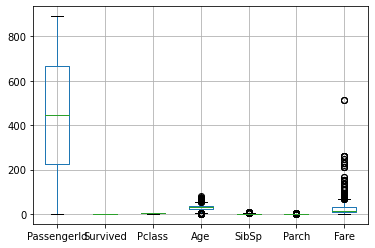

In [8]:
maindat.boxplot() # plots the outliers to easily visualize how large discrepancies are

In [9]:
# determine the IQR scores and limiting values in order to treat the outliers
IQR_Age=maindat['Age'].quantile(0.80)-maindat['Age'].quantile(0.20)
IQR_Age

18.0

In [10]:
# determine the IQR scores and limiting values in order to treat the outliers
Upper_OutlierLimit=maindat['Age'].quantile(0.80)+1.5*IQR_Age
Upper_OutlierLimit

65.0

In [11]:
# determine the IQR scores and limiting values in order to treat the outliers
OutlierValues=maindat[(maindat['Age']>Upper_OutlierLimit)]
OutlierValues

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [12]:
maindat['Age']=np.where(maindat['Age']>Upper_OutlierLimit, maindat['Age'].quantile(0.75),maindat['Age'])
maindat

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [13]:
# determine the IQR scores and limiting values in order to treat the outliers
IQR_Fare=maindat['Fare'].quantile(0.80)-maindat['Fare'].quantile(0.20)
IQR_Fare

31.8333

In [14]:
# determine the IQR scores and limiting values in order to treat the outliers
Upper_OutlierLimit2=maindat['Fare'].quantile(0.80)+1.5*IQR_Age
Upper_OutlierLimit2

66.6875

In [15]:
# determine the IQR scores and limiting values in order to treat the outliers
OutlierValues2=maindat[(maindat['Fare']>Upper_OutlierLimit2)]
OutlierValues2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,29.699118,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,NaN,S


In [16]:
maindat['Fare']=np.where(maindat['Fare']>Upper_OutlierLimit2, maindat['Fare'].quantile(0.75),maindat['Fare'])
maindat

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,31.000,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.000,C148,C


<AxesSubplot:>

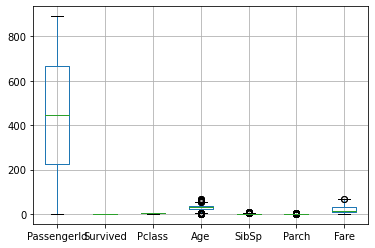

In [17]:
maindat.boxplot() # this is to show how the outliers in the data have been changed

In [18]:
# here we filter the dataframe and identify which columns contain continuous data
cols_with_chars=maindat.dtypes==object
cols_with_chars

PassengerId    False
Survived       False
Pclass         False
Name            True
Sex             True
Age            False
SibSp          False
Parch          False
Ticket          True
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [19]:
# now that we have what columns have continuous data, we will remove the variables with many unique values
# Name, Ticket, and Cabin values cannot be distinguished through binary values, therefor we will have to temporarily exclude them
maindat.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
maindat

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.250,S
1,2,1,1,female,38.000000,1,0,31.000,C
2,3,1,3,female,26.000000,0,0,7.925,S
3,4,1,1,female,35.000000,1,0,53.100,S
4,5,0,3,male,35.000000,0,0,8.050,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.000,S
887,888,1,1,female,19.000000,0,0,30.000,S
888,889,0,3,female,29.699118,1,2,23.450,S
889,890,1,1,male,26.000000,0,0,30.000,C


In [20]:
# we are going to convert continuous values into binary values to columns that has only 2 or 3 unique values
# Sex can only be male or female, hence they can be represented as 1 or 2
# Embarked contains 3 unique values, hence a value of 1 represents an instance when a certain class is appropriate in the column
maindat=pd.get_dummies(maindat,drop_first=False)
maindat

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.250,0,1,0,0,1
1,2,1,1,38.000000,1,0,31.000,1,0,1,0,0
2,3,1,3,26.000000,0,0,7.925,1,0,0,0,1
3,4,1,1,35.000000,1,0,53.100,1,0,0,0,1
4,5,0,3,35.000000,0,0,8.050,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.000,0,1,0,0,1
887,888,1,1,19.000000,0,0,30.000,1,0,0,0,1
888,889,0,3,29.699118,1,2,23.450,1,0,0,0,1
889,890,1,1,26.000000,0,0,30.000,0,1,1,0,0


In [21]:
cols=maindat.columns
# here we are going to identify what columns would be shown on the data frame
cols=['PassengerId','Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_C','Embarked_Q','Embarked_S','Survived']
maindat=maindat[cols]
maindat

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,1,3,22.000000,1,0,7.250,1,0,0,1,0
1,2,1,38.000000,1,0,31.000,0,1,0,0,1
2,3,3,26.000000,0,0,7.925,0,0,0,1,1
3,4,1,35.000000,1,0,53.100,0,0,0,1,1
4,5,3,35.000000,0,0,8.050,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.000,1,0,0,1,0
887,888,1,19.000000,0,0,30.000,0,0,0,1,1
888,889,3,29.699118,1,2,23.450,0,0,0,1,0
889,890,1,26.000000,0,0,30.000,1,1,0,0,1


In [22]:
# Identify the size of the training and the testing data
train_da=maindat.iloc[:,:-1].values
train_te=maindat.iloc[:,-1].values
print("Training Data Size: ", train_da.shape)
print("Training Test Size: ", train_te.shape)

Training Data Size:  (891, 10)
Training Test Size:  (891,)


In [23]:
# Identify the size of the training and the testing data
x_train, x_test, y_train, y_test = train_test_split(train_da, train_te, test_size=0.20, random_state=5)
print("X train: ", x_train.shape)
print("X test:  ", x_test.shape)
print("Y train: ", y_train.shape)
print("Y test:  ", y_test.shape)

X train:  (712, 10)
X test:   (179, 10)
Y train:  (712,)
Y test:   (179,)


In [24]:
# CREATING THE MODEL FOR THE SECOND MACHINE LEARNING ALGORITHM WHICH IS LOGISTIC REGRESSION
lr = LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\gabot\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_pred = lr.predict(x_test)
print("Y test: ", y_test)
print("\nPrediction: ", y_pred)

Y test:  [0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0
 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0]

Prediction:  [0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0
 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0
 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0]


In [26]:
# THIS LINE OF CODE WOULD IDENTIFY THE ACCURACY OF THE MODEL
accuracy = metrics.accuracy_score(y_test, y_pred)
print ("Accuracy from metrics: ", accuracy)

Accuracy from metrics:  0.8156424581005587


In [27]:
# preparing the data to be used in the algorithm
y_train2 = maindat.pop("Survived")
num_vars=list(maindat.dtypes[maindat.dtypes != "object"].index)
maindat[num_vars]

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.000000,1,0,7.250,1,0,0,1
1,2,1,38.000000,1,0,31.000,0,1,0,0
2,3,3,26.000000,0,0,7.925,0,0,0,1
3,4,1,35.000000,1,0,53.100,0,0,0,1
4,5,3,35.000000,0,0,8.050,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.000,1,0,0,1
887,888,1,19.000000,0,0,30.000,0,0,0,1
888,889,3,29.699118,1,2,23.450,0,0,0,1
889,890,1,26.000000,0,0,30.000,1,1,0,0


In [28]:
# CREATING THE MODEL FOR THE SECOND MACHINE LEARNING ALGORITHM WHICH IS RANDOM FOREST REGRESSOR
rf = RandomForestRegressor(n_estimators=200, oob_score=True)
rf.fit(maindat[num_vars], y_train2)

RandomForestRegressor(n_estimators=200, oob_score=True)

In [29]:
rf.oob_score_

0.4170030564630526

In [30]:
# THIS LINE OF CODE WOULD IDENTIFY THE ACCURACY OF THE MODEL
y_pred2 = rf.oob_prediction_
print("c-stat: ", roc_auc_score(y_train2, y_pred2))

c-stat:  0.8647887173915358


In [31]:
# calling out additional libraries to be used in the Nueral Network modeling
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from numpy.random import seed

In [32]:
# preparing the data to be used in the algorithm
# convert the values from the dataframe into decimal values
dat4nn = maindat.astype('float32')
dat4nn

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,3.0,22.000000,1.0,0.0,7.250000,1.0,0.0,0.0,1.0
1,2.0,1.0,38.000000,1.0,0.0,31.000000,0.0,1.0,0.0,0.0
2,3.0,3.0,26.000000,0.0,0.0,7.925000,0.0,0.0,0.0,1.0
3,4.0,1.0,35.000000,1.0,0.0,53.099998,0.0,0.0,0.0,1.0
4,5.0,3.0,35.000000,0.0,0.0,8.050000,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,887.0,2.0,27.000000,0.0,0.0,13.000000,1.0,0.0,0.0,1.0
887,888.0,1.0,19.000000,0.0,0.0,30.000000,0.0,0.0,0.0,1.0
888,889.0,3.0,29.699118,1.0,2.0,23.450001,0.0,0.0,0.0,1.0
889,890.0,1.0,26.000000,0.0,0.0,30.000000,1.0,1.0,0.0,0.0


In [33]:
# We are going to create a function which allows to parameterise the choice of hyperparameters in the neural network.
def create_model(lyrs=[12], act='linear', opt='Adam', dr=0.0):
    # set random seed for reproducibility
    seed(42)
    tf.random.set_seed(42) 
    NNmod = Sequential()
    # create first hidden layer
    NNmod.add(Dense(lyrs[0], input_dim=x_train.shape[1], activation=act))
    # create additional hidden layers
    for i in range(1,len(lyrs)):
        NNmod.add(Dense(lyrs[i], activation=act))
    # add dropout, default is none
    NNmod.add(Dropout(dr))
    # create output layer
    NNmod.add(Dense(1, activation='sigmoid'))
    NNmod.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return NNmod

In [34]:
NNmod = create_model()
print(NNmod.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                132       
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
# train model on full train set
training = NNmod.fit(x_train, y_train, epochs=2000, batch_size=50, validation_split=0.4, verbose=2)
# THIS LINE OF CODE WOULD IDENTIFY THE ACCURACY OF THE MODEL
percentage = np.mean(training.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', percentage*100))

Epoch 1/2000
9/9 - 0s - loss: 0.5131 - accuracy: 0.7681 - val_loss: 0.5378 - val_accuracy: 0.7579 - 197ms/epoch - 22ms/step
Epoch 2/2000
9/9 - 0s - loss: 0.5389 - accuracy: 0.7635 - val_loss: 0.6629 - val_accuracy: 0.6842 - 94ms/epoch - 10ms/step
Epoch 3/2000
9/9 - 0s - loss: 0.4895 - accuracy: 0.7916 - val_loss: 0.5164 - val_accuracy: 0.7333 - 96ms/epoch - 11ms/step
Epoch 4/2000
9/9 - 0s - loss: 0.5035 - accuracy: 0.7892 - val_loss: 0.6040 - val_accuracy: 0.7649 - 106ms/epoch - 12ms/step
Epoch 5/2000
9/9 - 0s - loss: 0.4602 - accuracy: 0.8009 - val_loss: 0.6282 - val_accuracy: 0.7544 - 94ms/epoch - 10ms/step
Epoch 6/2000
9/9 - 0s - loss: 0.4695 - accuracy: 0.8009 - val_loss: 0.5310 - val_accuracy: 0.7579 - 91ms/epoch - 10ms/step
Epoch 7/2000
9/9 - 0s - loss: 0.4154 - accuracy: 0.8244 - val_loss: 0.5147 - val_accuracy: 0.7368 - 91ms/epoch - 10ms/step
Epoch 8/2000
9/9 - 0s - loss: 0.4228 - accuracy: 0.8126 - val_loss: 0.5108 - val_accuracy: 0.7579 - 98ms/epoch - 11ms/step
Epoch 9/2000
9

Epoch 68/2000
9/9 - 0s - loss: 0.4929 - accuracy: 0.8103 - val_loss: 0.5243 - val_accuracy: 0.7263 - 99ms/epoch - 11ms/step
Epoch 69/2000
9/9 - 0s - loss: 0.4659 - accuracy: 0.7822 - val_loss: 0.5821 - val_accuracy: 0.7684 - 89ms/epoch - 10ms/step
Epoch 70/2000
9/9 - 0s - loss: 0.4374 - accuracy: 0.7963 - val_loss: 0.5401 - val_accuracy: 0.7614 - 86ms/epoch - 10ms/step
Epoch 71/2000
9/9 - 0s - loss: 0.4300 - accuracy: 0.8267 - val_loss: 0.5077 - val_accuracy: 0.7614 - 86ms/epoch - 10ms/step
Epoch 72/2000
9/9 - 0s - loss: 0.4143 - accuracy: 0.8103 - val_loss: 0.5187 - val_accuracy: 0.7579 - 82ms/epoch - 9ms/step
Epoch 73/2000
9/9 - 0s - loss: 0.4181 - accuracy: 0.8080 - val_loss: 0.5276 - val_accuracy: 0.7614 - 87ms/epoch - 10ms/step
Epoch 74/2000
9/9 - 0s - loss: 0.4381 - accuracy: 0.8150 - val_loss: 0.5210 - val_accuracy: 0.7404 - 83ms/epoch - 9ms/step
Epoch 75/2000
9/9 - 0s - loss: 0.4217 - accuracy: 0.8150 - val_loss: 0.5126 - val_accuracy: 0.7544 - 84ms/epoch - 9ms/step
Epoch 76/20

Epoch 134/2000
9/9 - 0s - loss: 0.4356 - accuracy: 0.8173 - val_loss: 0.5123 - val_accuracy: 0.7579 - 92ms/epoch - 10ms/step
Epoch 135/2000
9/9 - 0s - loss: 0.4113 - accuracy: 0.8197 - val_loss: 0.5106 - val_accuracy: 0.7579 - 92ms/epoch - 10ms/step
Epoch 136/2000
9/9 - 0s - loss: 0.4194 - accuracy: 0.8220 - val_loss: 0.5908 - val_accuracy: 0.7649 - 91ms/epoch - 10ms/step
Epoch 137/2000
9/9 - 0s - loss: 0.4389 - accuracy: 0.8009 - val_loss: 0.5201 - val_accuracy: 0.7509 - 109ms/epoch - 12ms/step
Epoch 138/2000
9/9 - 0s - loss: 0.4193 - accuracy: 0.8126 - val_loss: 0.5134 - val_accuracy: 0.7579 - 92ms/epoch - 10ms/step
Epoch 139/2000
9/9 - 0s - loss: 0.4143 - accuracy: 0.8126 - val_loss: 0.5126 - val_accuracy: 0.7579 - 94ms/epoch - 10ms/step
Epoch 140/2000
9/9 - 0s - loss: 0.4291 - accuracy: 0.8009 - val_loss: 0.5180 - val_accuracy: 0.7509 - 93ms/epoch - 10ms/step
Epoch 141/2000
9/9 - 0s - loss: 0.4654 - accuracy: 0.7916 - val_loss: 0.5144 - val_accuracy: 0.7544 - 88ms/epoch - 10ms/step

Epoch 200/2000
9/9 - 0s - loss: 0.4179 - accuracy: 0.8056 - val_loss: 0.5521 - val_accuracy: 0.7684 - 86ms/epoch - 10ms/step
Epoch 201/2000
9/9 - 0s - loss: 0.4716 - accuracy: 0.8056 - val_loss: 0.5114 - val_accuracy: 0.7579 - 86ms/epoch - 10ms/step
Epoch 202/2000
9/9 - 0s - loss: 0.4357 - accuracy: 0.8244 - val_loss: 0.5166 - val_accuracy: 0.7579 - 86ms/epoch - 10ms/step
Epoch 203/2000
9/9 - 0s - loss: 0.4161 - accuracy: 0.8220 - val_loss: 0.6050 - val_accuracy: 0.7018 - 86ms/epoch - 10ms/step
Epoch 204/2000
9/9 - 0s - loss: 0.4678 - accuracy: 0.8009 - val_loss: 0.5099 - val_accuracy: 0.7544 - 84ms/epoch - 9ms/step
Epoch 205/2000
9/9 - 0s - loss: 0.4283 - accuracy: 0.8033 - val_loss: 0.5085 - val_accuracy: 0.7579 - 84ms/epoch - 9ms/step
Epoch 206/2000
9/9 - 0s - loss: 0.4159 - accuracy: 0.8126 - val_loss: 0.5120 - val_accuracy: 0.7579 - 85ms/epoch - 9ms/step
Epoch 207/2000
9/9 - 0s - loss: 0.4190 - accuracy: 0.8267 - val_loss: 0.5310 - val_accuracy: 0.7614 - 87ms/epoch - 10ms/step
Epo

Epoch 266/2000
9/9 - 0s - loss: 0.4225 - accuracy: 0.8267 - val_loss: 0.5435 - val_accuracy: 0.7649 - 84ms/epoch - 9ms/step
Epoch 267/2000
9/9 - 0s - loss: 0.4151 - accuracy: 0.8056 - val_loss: 0.5154 - val_accuracy: 0.7579 - 90ms/epoch - 10ms/step
Epoch 268/2000
9/9 - 0s - loss: 0.4116 - accuracy: 0.8267 - val_loss: 0.5141 - val_accuracy: 0.7474 - 90ms/epoch - 10ms/step
Epoch 269/2000
9/9 - 0s - loss: 0.4171 - accuracy: 0.8220 - val_loss: 0.5161 - val_accuracy: 0.7368 - 123ms/epoch - 14ms/step
Epoch 270/2000
9/9 - 0s - loss: 0.4388 - accuracy: 0.8103 - val_loss: 0.5220 - val_accuracy: 0.7404 - 197ms/epoch - 22ms/step
Epoch 271/2000
9/9 - 0s - loss: 0.4343 - accuracy: 0.8080 - val_loss: 0.5552 - val_accuracy: 0.7719 - 172ms/epoch - 19ms/step
Epoch 272/2000
9/9 - 0s - loss: 0.4121 - accuracy: 0.8290 - val_loss: 0.5125 - val_accuracy: 0.7579 - 111ms/epoch - 12ms/step
Epoch 273/2000
9/9 - 0s - loss: 0.4338 - accuracy: 0.8056 - val_loss: 0.5228 - val_accuracy: 0.7333 - 94ms/epoch - 10ms/st

Epoch 332/2000
9/9 - 0s - loss: 0.4393 - accuracy: 0.8033 - val_loss: 0.5133 - val_accuracy: 0.7544 - 89ms/epoch - 10ms/step
Epoch 333/2000
9/9 - 0s - loss: 0.4359 - accuracy: 0.8080 - val_loss: 0.6150 - val_accuracy: 0.7614 - 91ms/epoch - 10ms/step
Epoch 334/2000
9/9 - 0s - loss: 0.4260 - accuracy: 0.8150 - val_loss: 0.5101 - val_accuracy: 0.7544 - 93ms/epoch - 10ms/step
Epoch 335/2000
9/9 - 0s - loss: 0.4200 - accuracy: 0.8173 - val_loss: 0.5858 - val_accuracy: 0.7649 - 93ms/epoch - 10ms/step
Epoch 336/2000
9/9 - 0s - loss: 0.4243 - accuracy: 0.8173 - val_loss: 0.5117 - val_accuracy: 0.7544 - 95ms/epoch - 11ms/step
Epoch 337/2000
9/9 - 0s - loss: 0.4169 - accuracy: 0.8080 - val_loss: 0.5120 - val_accuracy: 0.7544 - 86ms/epoch - 10ms/step
Epoch 338/2000
9/9 - 0s - loss: 0.4191 - accuracy: 0.8033 - val_loss: 0.5121 - val_accuracy: 0.7579 - 93ms/epoch - 10ms/step
Epoch 339/2000
9/9 - 0s - loss: 0.4130 - accuracy: 0.8150 - val_loss: 0.5437 - val_accuracy: 0.7579 - 89ms/epoch - 10ms/step


Epoch 398/2000
9/9 - 0s - loss: 0.4324 - accuracy: 0.8197 - val_loss: 0.5113 - val_accuracy: 0.7544 - 94ms/epoch - 10ms/step
Epoch 399/2000
9/9 - 0s - loss: 0.4309 - accuracy: 0.8080 - val_loss: 0.5139 - val_accuracy: 0.7579 - 88ms/epoch - 10ms/step
Epoch 400/2000
9/9 - 0s - loss: 0.4226 - accuracy: 0.8103 - val_loss: 0.5230 - val_accuracy: 0.7544 - 86ms/epoch - 10ms/step
Epoch 401/2000
9/9 - 0s - loss: 0.4157 - accuracy: 0.8126 - val_loss: 0.6193 - val_accuracy: 0.7614 - 90ms/epoch - 10ms/step
Epoch 402/2000
9/9 - 0s - loss: 0.4607 - accuracy: 0.8103 - val_loss: 0.5584 - val_accuracy: 0.7719 - 90ms/epoch - 10ms/step
Epoch 403/2000
9/9 - 0s - loss: 0.4366 - accuracy: 0.8173 - val_loss: 0.5368 - val_accuracy: 0.7614 - 91ms/epoch - 10ms/step
Epoch 404/2000
9/9 - 0s - loss: 0.4312 - accuracy: 0.8080 - val_loss: 0.5435 - val_accuracy: 0.7649 - 97ms/epoch - 11ms/step
Epoch 405/2000
9/9 - 0s - loss: 0.4257 - accuracy: 0.8103 - val_loss: 0.5174 - val_accuracy: 0.7509 - 90ms/epoch - 10ms/step


Epoch 464/2000
9/9 - 0s - loss: 0.4213 - accuracy: 0.8103 - val_loss: 0.5792 - val_accuracy: 0.7649 - 91ms/epoch - 10ms/step
Epoch 465/2000
9/9 - 0s - loss: 0.4064 - accuracy: 0.8384 - val_loss: 0.5276 - val_accuracy: 0.7333 - 86ms/epoch - 10ms/step
Epoch 466/2000
9/9 - 0s - loss: 0.4363 - accuracy: 0.8103 - val_loss: 0.5282 - val_accuracy: 0.7298 - 86ms/epoch - 10ms/step
Epoch 467/2000
9/9 - 0s - loss: 0.4193 - accuracy: 0.8197 - val_loss: 0.5159 - val_accuracy: 0.7614 - 84ms/epoch - 9ms/step
Epoch 468/2000
9/9 - 0s - loss: 0.4152 - accuracy: 0.8056 - val_loss: 0.5093 - val_accuracy: 0.7579 - 90ms/epoch - 10ms/step
Epoch 469/2000
9/9 - 0s - loss: 0.4249 - accuracy: 0.8103 - val_loss: 0.5091 - val_accuracy: 0.7544 - 92ms/epoch - 10ms/step
Epoch 470/2000
9/9 - 0s - loss: 0.4284 - accuracy: 0.8056 - val_loss: 0.5243 - val_accuracy: 0.7614 - 86ms/epoch - 10ms/step
Epoch 471/2000
9/9 - 0s - loss: 0.4464 - accuracy: 0.8103 - val_loss: 0.5171 - val_accuracy: 0.7614 - 85ms/epoch - 9ms/step
Ep

Epoch 530/2000
9/9 - 0s - loss: 0.4158 - accuracy: 0.8056 - val_loss: 0.5406 - val_accuracy: 0.7684 - 94ms/epoch - 10ms/step
Epoch 531/2000
9/9 - 0s - loss: 0.4375 - accuracy: 0.8126 - val_loss: 0.5674 - val_accuracy: 0.7684 - 87ms/epoch - 10ms/step
Epoch 532/2000
9/9 - 0s - loss: 0.4411 - accuracy: 0.8033 - val_loss: 0.5504 - val_accuracy: 0.7684 - 90ms/epoch - 10ms/step
Epoch 533/2000
9/9 - 0s - loss: 0.4401 - accuracy: 0.8033 - val_loss: 0.5985 - val_accuracy: 0.7684 - 112ms/epoch - 12ms/step
Epoch 534/2000
9/9 - 0s - loss: 0.4450 - accuracy: 0.8103 - val_loss: 0.5723 - val_accuracy: 0.7579 - 136ms/epoch - 15ms/step
Epoch 535/2000
9/9 - 0s - loss: 0.4734 - accuracy: 0.7986 - val_loss: 0.6093 - val_accuracy: 0.7649 - 128ms/epoch - 14ms/step
Epoch 536/2000
9/9 - 0s - loss: 0.4749 - accuracy: 0.7963 - val_loss: 0.5522 - val_accuracy: 0.7298 - 134ms/epoch - 15ms/step
Epoch 537/2000
9/9 - 0s - loss: 0.4484 - accuracy: 0.8080 - val_loss: 0.5172 - val_accuracy: 0.7368 - 98ms/epoch - 11ms/s

Epoch 596/2000
9/9 - 0s - loss: 0.4144 - accuracy: 0.8244 - val_loss: 0.5154 - val_accuracy: 0.7579 - 101ms/epoch - 11ms/step
Epoch 597/2000
9/9 - 0s - loss: 0.4151 - accuracy: 0.8173 - val_loss: 0.5366 - val_accuracy: 0.7614 - 94ms/epoch - 10ms/step
Epoch 598/2000
9/9 - 0s - loss: 0.4244 - accuracy: 0.8150 - val_loss: 0.5516 - val_accuracy: 0.7684 - 93ms/epoch - 10ms/step
Epoch 599/2000
9/9 - 0s - loss: 0.4544 - accuracy: 0.8150 - val_loss: 0.5197 - val_accuracy: 0.7404 - 89ms/epoch - 10ms/step
Epoch 600/2000
9/9 - 0s - loss: 0.4279 - accuracy: 0.8033 - val_loss: 0.5104 - val_accuracy: 0.7579 - 92ms/epoch - 10ms/step
Epoch 601/2000
9/9 - 0s - loss: 0.4128 - accuracy: 0.8150 - val_loss: 0.5237 - val_accuracy: 0.7544 - 91ms/epoch - 10ms/step
Epoch 602/2000
9/9 - 0s - loss: 0.4128 - accuracy: 0.8126 - val_loss: 0.5116 - val_accuracy: 0.7579 - 87ms/epoch - 10ms/step
Epoch 603/2000
9/9 - 0s - loss: 0.4110 - accuracy: 0.8173 - val_loss: 0.5111 - val_accuracy: 0.7544 - 92ms/epoch - 10ms/step

Epoch 662/2000
9/9 - 0s - loss: 0.4147 - accuracy: 0.8244 - val_loss: 0.5183 - val_accuracy: 0.7439 - 85ms/epoch - 9ms/step
Epoch 663/2000
9/9 - 0s - loss: 0.4347 - accuracy: 0.8173 - val_loss: 0.5278 - val_accuracy: 0.7544 - 93ms/epoch - 10ms/step
Epoch 664/2000
9/9 - 0s - loss: 0.4122 - accuracy: 0.8150 - val_loss: 0.5163 - val_accuracy: 0.7544 - 111ms/epoch - 12ms/step
Epoch 665/2000
9/9 - 0s - loss: 0.4241 - accuracy: 0.8197 - val_loss: 0.5167 - val_accuracy: 0.7579 - 115ms/epoch - 13ms/step
Epoch 666/2000
9/9 - 0s - loss: 0.4165 - accuracy: 0.8197 - val_loss: 0.5115 - val_accuracy: 0.7509 - 116ms/epoch - 13ms/step
Epoch 667/2000
9/9 - 0s - loss: 0.4135 - accuracy: 0.8103 - val_loss: 0.5263 - val_accuracy: 0.7649 - 86ms/epoch - 10ms/step
Epoch 668/2000
9/9 - 0s - loss: 0.4273 - accuracy: 0.8173 - val_loss: 0.5750 - val_accuracy: 0.7649 - 83ms/epoch - 9ms/step
Epoch 669/2000
9/9 - 0s - loss: 0.4300 - accuracy: 0.8126 - val_loss: 0.5301 - val_accuracy: 0.7614 - 85ms/epoch - 9ms/step


Epoch 728/2000
9/9 - 0s - loss: 0.4267 - accuracy: 0.8220 - val_loss: 0.5218 - val_accuracy: 0.7579 - 87ms/epoch - 10ms/step
Epoch 729/2000
9/9 - 0s - loss: 0.4149 - accuracy: 0.8103 - val_loss: 0.5270 - val_accuracy: 0.7614 - 111ms/epoch - 12ms/step
Epoch 730/2000
9/9 - 0s - loss: 0.4257 - accuracy: 0.8173 - val_loss: 0.5421 - val_accuracy: 0.7333 - 103ms/epoch - 11ms/step
Epoch 731/2000
9/9 - 0s - loss: 0.4339 - accuracy: 0.8244 - val_loss: 0.5105 - val_accuracy: 0.7579 - 92ms/epoch - 10ms/step
Epoch 732/2000
9/9 - 0s - loss: 0.4308 - accuracy: 0.8197 - val_loss: 0.5146 - val_accuracy: 0.7614 - 92ms/epoch - 10ms/step
Epoch 733/2000
9/9 - 0s - loss: 0.4332 - accuracy: 0.8220 - val_loss: 0.5131 - val_accuracy: 0.7439 - 86ms/epoch - 10ms/step
Epoch 734/2000
9/9 - 0s - loss: 0.4086 - accuracy: 0.8173 - val_loss: 0.5439 - val_accuracy: 0.7719 - 89ms/epoch - 10ms/step
Epoch 735/2000
9/9 - 0s - loss: 0.4316 - accuracy: 0.8056 - val_loss: 0.5210 - val_accuracy: 0.7579 - 84ms/epoch - 9ms/step

Epoch 794/2000
9/9 - 0s - loss: 0.4299 - accuracy: 0.8103 - val_loss: 0.5134 - val_accuracy: 0.7474 - 81ms/epoch - 9ms/step
Epoch 795/2000
9/9 - 0s - loss: 0.4386 - accuracy: 0.8244 - val_loss: 0.5779 - val_accuracy: 0.7123 - 118ms/epoch - 13ms/step
Epoch 796/2000
9/9 - 0s - loss: 0.4376 - accuracy: 0.7986 - val_loss: 0.5411 - val_accuracy: 0.7579 - 99ms/epoch - 11ms/step
Epoch 797/2000
9/9 - 0s - loss: 0.4507 - accuracy: 0.8080 - val_loss: 0.5151 - val_accuracy: 0.7579 - 80ms/epoch - 9ms/step
Epoch 798/2000
9/9 - 0s - loss: 0.4197 - accuracy: 0.8056 - val_loss: 0.5101 - val_accuracy: 0.7544 - 86ms/epoch - 10ms/step
Epoch 799/2000
9/9 - 0s - loss: 0.4241 - accuracy: 0.8126 - val_loss: 0.5580 - val_accuracy: 0.7263 - 92ms/epoch - 10ms/step
Epoch 800/2000
9/9 - 0s - loss: 0.4725 - accuracy: 0.7986 - val_loss: 0.5295 - val_accuracy: 0.7333 - 86ms/epoch - 10ms/step
Epoch 801/2000
9/9 - 0s - loss: 0.4342 - accuracy: 0.8103 - val_loss: 0.5247 - val_accuracy: 0.7368 - 84ms/epoch - 9ms/step
Ep

Epoch 860/2000
9/9 - 0s - loss: 0.4274 - accuracy: 0.8244 - val_loss: 0.5206 - val_accuracy: 0.7368 - 83ms/epoch - 9ms/step
Epoch 861/2000
9/9 - 0s - loss: 0.4249 - accuracy: 0.8337 - val_loss: 0.5317 - val_accuracy: 0.7333 - 81ms/epoch - 9ms/step
Epoch 862/2000
9/9 - 0s - loss: 0.4299 - accuracy: 0.8080 - val_loss: 0.5118 - val_accuracy: 0.7579 - 86ms/epoch - 10ms/step
Epoch 863/2000
9/9 - 0s - loss: 0.4143 - accuracy: 0.8103 - val_loss: 0.5567 - val_accuracy: 0.7719 - 84ms/epoch - 9ms/step
Epoch 864/2000
9/9 - 0s - loss: 0.4463 - accuracy: 0.8033 - val_loss: 0.5105 - val_accuracy: 0.7579 - 85ms/epoch - 9ms/step
Epoch 865/2000
9/9 - 0s - loss: 0.4142 - accuracy: 0.8150 - val_loss: 0.5110 - val_accuracy: 0.7544 - 83ms/epoch - 9ms/step
Epoch 866/2000
9/9 - 0s - loss: 0.4200 - accuracy: 0.8056 - val_loss: 0.5225 - val_accuracy: 0.7544 - 81ms/epoch - 9ms/step
Epoch 867/2000
9/9 - 0s - loss: 0.4587 - accuracy: 0.8056 - val_loss: 0.5187 - val_accuracy: 0.7544 - 86ms/epoch - 10ms/step
Epoch 

Epoch 926/2000
9/9 - 0s - loss: 0.4147 - accuracy: 0.8173 - val_loss: 0.5143 - val_accuracy: 0.7544 - 90ms/epoch - 10ms/step
Epoch 927/2000
9/9 - 0s - loss: 0.4253 - accuracy: 0.7963 - val_loss: 0.5167 - val_accuracy: 0.7544 - 88ms/epoch - 10ms/step
Epoch 928/2000
9/9 - 0s - loss: 0.4101 - accuracy: 0.8173 - val_loss: 0.5148 - val_accuracy: 0.7509 - 89ms/epoch - 10ms/step
Epoch 929/2000
9/9 - 0s - loss: 0.4278 - accuracy: 0.8244 - val_loss: 0.5119 - val_accuracy: 0.7509 - 82ms/epoch - 9ms/step
Epoch 930/2000
9/9 - 0s - loss: 0.4436 - accuracy: 0.7963 - val_loss: 0.5243 - val_accuracy: 0.7614 - 86ms/epoch - 10ms/step
Epoch 931/2000
9/9 - 0s - loss: 0.4682 - accuracy: 0.7939 - val_loss: 0.6260 - val_accuracy: 0.7544 - 102ms/epoch - 11ms/step
Epoch 932/2000
9/9 - 0s - loss: 0.4296 - accuracy: 0.8126 - val_loss: 0.5103 - val_accuracy: 0.7579 - 94ms/epoch - 10ms/step
Epoch 933/2000
9/9 - 0s - loss: 0.4127 - accuracy: 0.8103 - val_loss: 0.5190 - val_accuracy: 0.7579 - 92ms/epoch - 10ms/step


Epoch 992/2000
9/9 - 0s - loss: 0.4179 - accuracy: 0.8080 - val_loss: 0.5186 - val_accuracy: 0.7368 - 84ms/epoch - 9ms/step
Epoch 993/2000
9/9 - 0s - loss: 0.4253 - accuracy: 0.8220 - val_loss: 0.5099 - val_accuracy: 0.7544 - 87ms/epoch - 10ms/step
Epoch 994/2000
9/9 - 0s - loss: 0.4367 - accuracy: 0.7986 - val_loss: 0.5100 - val_accuracy: 0.7544 - 88ms/epoch - 10ms/step
Epoch 995/2000
9/9 - 0s - loss: 0.4220 - accuracy: 0.7986 - val_loss: 0.5107 - val_accuracy: 0.7579 - 87ms/epoch - 10ms/step
Epoch 996/2000
9/9 - 0s - loss: 0.4128 - accuracy: 0.8103 - val_loss: 0.5290 - val_accuracy: 0.7614 - 89ms/epoch - 10ms/step
Epoch 997/2000
9/9 - 0s - loss: 0.4356 - accuracy: 0.8126 - val_loss: 0.5861 - val_accuracy: 0.7649 - 82ms/epoch - 9ms/step
Epoch 998/2000
9/9 - 0s - loss: 0.4420 - accuracy: 0.8103 - val_loss: 0.5124 - val_accuracy: 0.7579 - 82ms/epoch - 9ms/step
Epoch 999/2000
9/9 - 0s - loss: 0.4220 - accuracy: 0.8150 - val_loss: 0.5109 - val_accuracy: 0.7579 - 80ms/epoch - 9ms/step
Epoc

Epoch 1058/2000
9/9 - 0s - loss: 0.4286 - accuracy: 0.8080 - val_loss: 0.5273 - val_accuracy: 0.7263 - 91ms/epoch - 10ms/step
Epoch 1059/2000
9/9 - 0s - loss: 0.4111 - accuracy: 0.8314 - val_loss: 0.5550 - val_accuracy: 0.7719 - 85ms/epoch - 9ms/step
Epoch 1060/2000
9/9 - 0s - loss: 0.4219 - accuracy: 0.8080 - val_loss: 0.5132 - val_accuracy: 0.7579 - 86ms/epoch - 10ms/step
Epoch 1061/2000
9/9 - 0s - loss: 0.4273 - accuracy: 0.8150 - val_loss: 0.5128 - val_accuracy: 0.7439 - 115ms/epoch - 13ms/step
Epoch 1062/2000
9/9 - 0s - loss: 0.4261 - accuracy: 0.8150 - val_loss: 0.5383 - val_accuracy: 0.7333 - 154ms/epoch - 17ms/step
Epoch 1063/2000
9/9 - 0s - loss: 0.4311 - accuracy: 0.8197 - val_loss: 0.5102 - val_accuracy: 0.7579 - 100ms/epoch - 11ms/step
Epoch 1064/2000
9/9 - 0s - loss: 0.4239 - accuracy: 0.8197 - val_loss: 0.5155 - val_accuracy: 0.7579 - 84ms/epoch - 9ms/step
Epoch 1065/2000
9/9 - 0s - loss: 0.4128 - accuracy: 0.8197 - val_loss: 0.5130 - val_accuracy: 0.7509 - 85ms/epoch - 9

Epoch 1123/2000
9/9 - 0s - loss: 0.4225 - accuracy: 0.8080 - val_loss: 0.5085 - val_accuracy: 0.7544 - 93ms/epoch - 10ms/step
Epoch 1124/2000
9/9 - 0s - loss: 0.4294 - accuracy: 0.8150 - val_loss: 0.5420 - val_accuracy: 0.7368 - 90ms/epoch - 10ms/step
Epoch 1125/2000
9/9 - 0s - loss: 0.4435 - accuracy: 0.8150 - val_loss: 0.5128 - val_accuracy: 0.7509 - 86ms/epoch - 10ms/step
Epoch 1126/2000
9/9 - 0s - loss: 0.4182 - accuracy: 0.8197 - val_loss: 0.6193 - val_accuracy: 0.7614 - 89ms/epoch - 10ms/step
Epoch 1127/2000
9/9 - 0s - loss: 0.4655 - accuracy: 0.7799 - val_loss: 0.5625 - val_accuracy: 0.7684 - 92ms/epoch - 10ms/step
Epoch 1128/2000
9/9 - 0s - loss: 0.4380 - accuracy: 0.8126 - val_loss: 0.5202 - val_accuracy: 0.7404 - 86ms/epoch - 10ms/step
Epoch 1129/2000
9/9 - 0s - loss: 0.4195 - accuracy: 0.8290 - val_loss: 0.5097 - val_accuracy: 0.7544 - 91ms/epoch - 10ms/step
Epoch 1130/2000
9/9 - 0s - loss: 0.4268 - accuracy: 0.8056 - val_loss: 0.5305 - val_accuracy: 0.7544 - 92ms/epoch - 10

Epoch 1188/2000
9/9 - 0s - loss: 0.4251 - accuracy: 0.8056 - val_loss: 0.5160 - val_accuracy: 0.7509 - 90ms/epoch - 10ms/step
Epoch 1189/2000
9/9 - 0s - loss: 0.4194 - accuracy: 0.8173 - val_loss: 0.5228 - val_accuracy: 0.7544 - 86ms/epoch - 10ms/step
Epoch 1190/2000
9/9 - 0s - loss: 0.4158 - accuracy: 0.8220 - val_loss: 0.5176 - val_accuracy: 0.7614 - 87ms/epoch - 10ms/step
Epoch 1191/2000
9/9 - 0s - loss: 0.4149 - accuracy: 0.8173 - val_loss: 0.5234 - val_accuracy: 0.7614 - 90ms/epoch - 10ms/step
Epoch 1192/2000
9/9 - 0s - loss: 0.4148 - accuracy: 0.8150 - val_loss: 0.5334 - val_accuracy: 0.7368 - 96ms/epoch - 11ms/step
Epoch 1193/2000
9/9 - 0s - loss: 0.4226 - accuracy: 0.8173 - val_loss: 0.5293 - val_accuracy: 0.7579 - 92ms/epoch - 10ms/step
Epoch 1194/2000
9/9 - 0s - loss: 0.4187 - accuracy: 0.8080 - val_loss: 0.5123 - val_accuracy: 0.7544 - 91ms/epoch - 10ms/step
Epoch 1195/2000
9/9 - 0s - loss: 0.4254 - accuracy: 0.8126 - val_loss: 0.5107 - val_accuracy: 0.7544 - 89ms/epoch - 10

Epoch 1253/2000
9/9 - 0s - loss: 0.4896 - accuracy: 0.7916 - val_loss: 0.5083 - val_accuracy: 0.7544 - 92ms/epoch - 10ms/step
Epoch 1254/2000
9/9 - 0s - loss: 0.4194 - accuracy: 0.8033 - val_loss: 0.5496 - val_accuracy: 0.7719 - 89ms/epoch - 10ms/step
Epoch 1255/2000
9/9 - 0s - loss: 0.4794 - accuracy: 0.7845 - val_loss: 0.6027 - val_accuracy: 0.7684 - 87ms/epoch - 10ms/step
Epoch 1256/2000
9/9 - 0s - loss: 0.4085 - accuracy: 0.8290 - val_loss: 0.5126 - val_accuracy: 0.7474 - 83ms/epoch - 9ms/step
Epoch 1257/2000
9/9 - 0s - loss: 0.4148 - accuracy: 0.8056 - val_loss: 0.5154 - val_accuracy: 0.7544 - 87ms/epoch - 10ms/step
Epoch 1258/2000
9/9 - 0s - loss: 0.4185 - accuracy: 0.8033 - val_loss: 0.5118 - val_accuracy: 0.7579 - 83ms/epoch - 9ms/step
Epoch 1259/2000
9/9 - 0s - loss: 0.4185 - accuracy: 0.8197 - val_loss: 0.5550 - val_accuracy: 0.7333 - 84ms/epoch - 9ms/step
Epoch 1260/2000
9/9 - 0s - loss: 0.4328 - accuracy: 0.8244 - val_loss: 0.5137 - val_accuracy: 0.7579 - 80ms/epoch - 9ms/s

Epoch 1319/2000
9/9 - 0s - loss: 0.4195 - accuracy: 0.8080 - val_loss: 0.5132 - val_accuracy: 0.7614 - 86ms/epoch - 10ms/step
Epoch 1320/2000
9/9 - 0s - loss: 0.4175 - accuracy: 0.8197 - val_loss: 0.5381 - val_accuracy: 0.7649 - 83ms/epoch - 9ms/step
Epoch 1321/2000
9/9 - 0s - loss: 0.4197 - accuracy: 0.8173 - val_loss: 0.5135 - val_accuracy: 0.7579 - 85ms/epoch - 9ms/step
Epoch 1322/2000
9/9 - 0s - loss: 0.4156 - accuracy: 0.8314 - val_loss: 0.5157 - val_accuracy: 0.7404 - 82ms/epoch - 9ms/step
Epoch 1323/2000
9/9 - 0s - loss: 0.4180 - accuracy: 0.8173 - val_loss: 0.5265 - val_accuracy: 0.7614 - 82ms/epoch - 9ms/step
Epoch 1324/2000
9/9 - 0s - loss: 0.4201 - accuracy: 0.8173 - val_loss: 0.5686 - val_accuracy: 0.7684 - 86ms/epoch - 10ms/step
Epoch 1325/2000
9/9 - 0s - loss: 0.4323 - accuracy: 0.8126 - val_loss: 0.5110 - val_accuracy: 0.7579 - 81ms/epoch - 9ms/step
Epoch 1326/2000
9/9 - 0s - loss: 0.4208 - accuracy: 0.8220 - val_loss: 0.5372 - val_accuracy: 0.7368 - 84ms/epoch - 9ms/ste

Epoch 1385/2000
9/9 - 0s - loss: 0.4618 - accuracy: 0.8126 - val_loss: 0.6043 - val_accuracy: 0.7684 - 81ms/epoch - 9ms/step
Epoch 1386/2000
9/9 - 0s - loss: 0.4711 - accuracy: 0.7916 - val_loss: 0.5225 - val_accuracy: 0.7614 - 85ms/epoch - 9ms/step
Epoch 1387/2000
9/9 - 0s - loss: 0.4195 - accuracy: 0.8056 - val_loss: 0.5329 - val_accuracy: 0.7579 - 89ms/epoch - 10ms/step
Epoch 1388/2000
9/9 - 0s - loss: 0.4305 - accuracy: 0.8056 - val_loss: 0.6139 - val_accuracy: 0.7614 - 86ms/epoch - 10ms/step
Epoch 1389/2000
9/9 - 0s - loss: 0.4738 - accuracy: 0.7775 - val_loss: 0.5803 - val_accuracy: 0.7614 - 90ms/epoch - 10ms/step
Epoch 1390/2000
9/9 - 0s - loss: 0.4419 - accuracy: 0.8080 - val_loss: 0.5097 - val_accuracy: 0.7544 - 81ms/epoch - 9ms/step
Epoch 1391/2000
9/9 - 0s - loss: 0.4382 - accuracy: 0.8150 - val_loss: 0.6092 - val_accuracy: 0.6947 - 80ms/epoch - 9ms/step
Epoch 1392/2000
9/9 - 0s - loss: 0.5120 - accuracy: 0.7892 - val_loss: 0.5454 - val_accuracy: 0.7368 - 84ms/epoch - 9ms/st

9/9 - 0s - loss: 0.4846 - accuracy: 0.7845 - val_loss: 0.5635 - val_accuracy: 0.7263 - 90ms/epoch - 10ms/step
Epoch 1451/2000
9/9 - 0s - loss: 0.4582 - accuracy: 0.8103 - val_loss: 0.5105 - val_accuracy: 0.7544 - 95ms/epoch - 11ms/step
Epoch 1452/2000
9/9 - 0s - loss: 0.4233 - accuracy: 0.8103 - val_loss: 0.5222 - val_accuracy: 0.7579 - 125ms/epoch - 14ms/step
Epoch 1453/2000
9/9 - 0s - loss: 0.4157 - accuracy: 0.8150 - val_loss: 0.5126 - val_accuracy: 0.7579 - 82ms/epoch - 9ms/step
Epoch 1454/2000
9/9 - 0s - loss: 0.4367 - accuracy: 0.8244 - val_loss: 0.5528 - val_accuracy: 0.7684 - 85ms/epoch - 9ms/step
Epoch 1455/2000
9/9 - 0s - loss: 0.4136 - accuracy: 0.8267 - val_loss: 0.5316 - val_accuracy: 0.7298 - 94ms/epoch - 10ms/step
Epoch 1456/2000
9/9 - 0s - loss: 0.4154 - accuracy: 0.8103 - val_loss: 0.5605 - val_accuracy: 0.7684 - 90ms/epoch - 10ms/step
Epoch 1457/2000
9/9 - 0s - loss: 0.4381 - accuracy: 0.8080 - val_loss: 0.5461 - val_accuracy: 0.7719 - 94ms/epoch - 10ms/step
Epoch 145

Epoch 1516/2000
9/9 - 0s - loss: 0.4192 - accuracy: 0.8150 - val_loss: 0.5281 - val_accuracy: 0.7579 - 84ms/epoch - 9ms/step
Epoch 1517/2000
9/9 - 0s - loss: 0.4142 - accuracy: 0.8220 - val_loss: 0.5110 - val_accuracy: 0.7579 - 92ms/epoch - 10ms/step
Epoch 1518/2000
9/9 - 0s - loss: 0.4140 - accuracy: 0.8150 - val_loss: 0.5421 - val_accuracy: 0.7614 - 94ms/epoch - 10ms/step
Epoch 1519/2000
9/9 - 0s - loss: 0.4212 - accuracy: 0.8009 - val_loss: 0.5128 - val_accuracy: 0.7579 - 99ms/epoch - 11ms/step
Epoch 1520/2000
9/9 - 0s - loss: 0.4292 - accuracy: 0.8009 - val_loss: 0.5187 - val_accuracy: 0.7404 - 97ms/epoch - 11ms/step
Epoch 1521/2000
9/9 - 0s - loss: 0.4214 - accuracy: 0.8126 - val_loss: 0.5161 - val_accuracy: 0.7579 - 102ms/epoch - 11ms/step
Epoch 1522/2000
9/9 - 0s - loss: 0.4228 - accuracy: 0.8126 - val_loss: 0.5256 - val_accuracy: 0.7579 - 92ms/epoch - 10ms/step
Epoch 1523/2000
9/9 - 0s - loss: 0.4310 - accuracy: 0.8150 - val_loss: 0.5180 - val_accuracy: 0.7404 - 98ms/epoch - 11

9/9 - 0s - loss: 0.4168 - accuracy: 0.8173 - val_loss: 0.5659 - val_accuracy: 0.7719 - 83ms/epoch - 9ms/step
Epoch 1582/2000
9/9 - 0s - loss: 0.4363 - accuracy: 0.7986 - val_loss: 0.5891 - val_accuracy: 0.7649 - 89ms/epoch - 10ms/step
Epoch 1583/2000
9/9 - 0s - loss: 0.4427 - accuracy: 0.7963 - val_loss: 0.5163 - val_accuracy: 0.7544 - 90ms/epoch - 10ms/step
Epoch 1584/2000
9/9 - 0s - loss: 0.4200 - accuracy: 0.8056 - val_loss: 0.5203 - val_accuracy: 0.7614 - 86ms/epoch - 10ms/step
Epoch 1585/2000
9/9 - 0s - loss: 0.4437 - accuracy: 0.8033 - val_loss: 0.5120 - val_accuracy: 0.7579 - 88ms/epoch - 10ms/step
Epoch 1586/2000
9/9 - 0s - loss: 0.4296 - accuracy: 0.8244 - val_loss: 0.6017 - val_accuracy: 0.7053 - 89ms/epoch - 10ms/step
Epoch 1587/2000
9/9 - 0s - loss: 0.4413 - accuracy: 0.8033 - val_loss: 0.6000 - val_accuracy: 0.7684 - 84ms/epoch - 9ms/step
Epoch 1588/2000
9/9 - 0s - loss: 0.4486 - accuracy: 0.8056 - val_loss: 0.5318 - val_accuracy: 0.7579 - 86ms/epoch - 10ms/step
Epoch 1589

Epoch 1647/2000
9/9 - 0s - loss: 0.4159 - accuracy: 0.8056 - val_loss: 0.5987 - val_accuracy: 0.7684 - 84ms/epoch - 9ms/step
Epoch 1648/2000
9/9 - 0s - loss: 0.4373 - accuracy: 0.8150 - val_loss: 0.5225 - val_accuracy: 0.7544 - 90ms/epoch - 10ms/step
Epoch 1649/2000
9/9 - 0s - loss: 0.4299 - accuracy: 0.8220 - val_loss: 0.5441 - val_accuracy: 0.7368 - 101ms/epoch - 11ms/step
Epoch 1650/2000
9/9 - 0s - loss: 0.4291 - accuracy: 0.8103 - val_loss: 0.5106 - val_accuracy: 0.7509 - 82ms/epoch - 9ms/step
Epoch 1651/2000
9/9 - 0s - loss: 0.4282 - accuracy: 0.8009 - val_loss: 0.5485 - val_accuracy: 0.7649 - 77ms/epoch - 9ms/step
Epoch 1652/2000
9/9 - 0s - loss: 0.4240 - accuracy: 0.8080 - val_loss: 0.5248 - val_accuracy: 0.7614 - 74ms/epoch - 8ms/step
Epoch 1653/2000
9/9 - 0s - loss: 0.4146 - accuracy: 0.8173 - val_loss: 0.5147 - val_accuracy: 0.7579 - 79ms/epoch - 9ms/step
Epoch 1654/2000
9/9 - 0s - loss: 0.4177 - accuracy: 0.8314 - val_loss: 0.5130 - val_accuracy: 0.7474 - 74ms/epoch - 8ms/st

Epoch 1713/2000
9/9 - 0s - loss: 0.4202 - accuracy: 0.8103 - val_loss: 0.5507 - val_accuracy: 0.7754 - 96ms/epoch - 11ms/step
Epoch 1714/2000
9/9 - 0s - loss: 0.4091 - accuracy: 0.8267 - val_loss: 0.5444 - val_accuracy: 0.7368 - 81ms/epoch - 9ms/step
Epoch 1715/2000
9/9 - 0s - loss: 0.4509 - accuracy: 0.8126 - val_loss: 0.5365 - val_accuracy: 0.7298 - 88ms/epoch - 10ms/step
Epoch 1716/2000
9/9 - 0s - loss: 0.4434 - accuracy: 0.8220 - val_loss: 0.5104 - val_accuracy: 0.7544 - 85ms/epoch - 9ms/step
Epoch 1717/2000
9/9 - 0s - loss: 0.4626 - accuracy: 0.7939 - val_loss: 0.5906 - val_accuracy: 0.7649 - 96ms/epoch - 11ms/step
Epoch 1718/2000
9/9 - 0s - loss: 0.4372 - accuracy: 0.8056 - val_loss: 0.5216 - val_accuracy: 0.7544 - 89ms/epoch - 10ms/step
Epoch 1719/2000
9/9 - 0s - loss: 0.4207 - accuracy: 0.8080 - val_loss: 0.5191 - val_accuracy: 0.7544 - 88ms/epoch - 10ms/step
Epoch 1720/2000
9/9 - 0s - loss: 0.4120 - accuracy: 0.8126 - val_loss: 0.5230 - val_accuracy: 0.7544 - 85ms/epoch - 9ms/

9/9 - 0s - loss: 0.4462 - accuracy: 0.8150 - val_loss: 0.5290 - val_accuracy: 0.7544 - 93ms/epoch - 10ms/step
Epoch 1779/2000
9/9 - 0s - loss: 0.4298 - accuracy: 0.7963 - val_loss: 0.5100 - val_accuracy: 0.7579 - 102ms/epoch - 11ms/step
Epoch 1780/2000
9/9 - 0s - loss: 0.4234 - accuracy: 0.8126 - val_loss: 0.5249 - val_accuracy: 0.7684 - 94ms/epoch - 10ms/step
Epoch 1781/2000
9/9 - 0s - loss: 0.4200 - accuracy: 0.8150 - val_loss: 0.5595 - val_accuracy: 0.7263 - 90ms/epoch - 10ms/step
Epoch 1782/2000
9/9 - 0s - loss: 0.4889 - accuracy: 0.7963 - val_loss: 0.5959 - val_accuracy: 0.7018 - 88ms/epoch - 10ms/step
Epoch 1783/2000
9/9 - 0s - loss: 0.4504 - accuracy: 0.8103 - val_loss: 0.5167 - val_accuracy: 0.7509 - 88ms/epoch - 10ms/step
Epoch 1784/2000
9/9 - 0s - loss: 0.4177 - accuracy: 0.8126 - val_loss: 0.5144 - val_accuracy: 0.7544 - 84ms/epoch - 9ms/step
Epoch 1785/2000
9/9 - 0s - loss: 0.4311 - accuracy: 0.7986 - val_loss: 0.5843 - val_accuracy: 0.7649 - 96ms/epoch - 11ms/step
Epoch 17

Epoch 1844/2000
9/9 - 0s - loss: 0.4147 - accuracy: 0.8126 - val_loss: 0.5119 - val_accuracy: 0.7579 - 90ms/epoch - 10ms/step
Epoch 1845/2000
9/9 - 0s - loss: 0.4238 - accuracy: 0.8197 - val_loss: 0.5109 - val_accuracy: 0.7579 - 89ms/epoch - 10ms/step
Epoch 1846/2000
9/9 - 0s - loss: 0.4256 - accuracy: 0.8197 - val_loss: 0.6027 - val_accuracy: 0.7684 - 87ms/epoch - 10ms/step
Epoch 1847/2000
9/9 - 0s - loss: 0.4351 - accuracy: 0.8150 - val_loss: 0.5189 - val_accuracy: 0.7509 - 94ms/epoch - 10ms/step
Epoch 1848/2000
9/9 - 0s - loss: 0.4206 - accuracy: 0.8056 - val_loss: 0.5130 - val_accuracy: 0.7579 - 94ms/epoch - 10ms/step
Epoch 1849/2000
9/9 - 0s - loss: 0.4257 - accuracy: 0.8080 - val_loss: 0.5125 - val_accuracy: 0.7509 - 88ms/epoch - 10ms/step
Epoch 1850/2000
9/9 - 0s - loss: 0.4239 - accuracy: 0.8103 - val_loss: 0.5105 - val_accuracy: 0.7579 - 90ms/epoch - 10ms/step
Epoch 1851/2000
9/9 - 0s - loss: 0.4166 - accuracy: 0.8197 - val_loss: 0.5110 - val_accuracy: 0.7579 - 85ms/epoch - 9m

9/9 - 0s - loss: 0.4144 - accuracy: 0.8103 - val_loss: 0.5542 - val_accuracy: 0.7719 - 88ms/epoch - 10ms/step
Epoch 1910/2000
9/9 - 0s - loss: 0.4358 - accuracy: 0.8173 - val_loss: 0.5662 - val_accuracy: 0.7684 - 89ms/epoch - 10ms/step
Epoch 1911/2000
9/9 - 0s - loss: 0.4435 - accuracy: 0.7963 - val_loss: 0.5249 - val_accuracy: 0.7614 - 93ms/epoch - 10ms/step
Epoch 1912/2000
9/9 - 0s - loss: 0.4248 - accuracy: 0.8150 - val_loss: 0.5237 - val_accuracy: 0.7333 - 84ms/epoch - 9ms/step
Epoch 1913/2000
9/9 - 0s - loss: 0.4473 - accuracy: 0.8033 - val_loss: 0.5429 - val_accuracy: 0.7333 - 98ms/epoch - 11ms/step
Epoch 1914/2000
9/9 - 0s - loss: 0.4373 - accuracy: 0.8197 - val_loss: 0.5095 - val_accuracy: 0.7509 - 98ms/epoch - 11ms/step
Epoch 1915/2000
9/9 - 0s - loss: 0.4725 - accuracy: 0.8033 - val_loss: 0.7161 - val_accuracy: 0.7404 - 108ms/epoch - 12ms/step
Epoch 1916/2000
9/9 - 0s - loss: 0.4577 - accuracy: 0.7869 - val_loss: 0.5519 - val_accuracy: 0.7684 - 94ms/epoch - 10ms/step
Epoch 19

Epoch 1975/2000
9/9 - 0s - loss: 0.5213 - accuracy: 0.7939 - val_loss: 0.6004 - val_accuracy: 0.7649 - 84ms/epoch - 9ms/step
Epoch 1976/2000
9/9 - 0s - loss: 0.4623 - accuracy: 0.7939 - val_loss: 0.5727 - val_accuracy: 0.7614 - 99ms/epoch - 11ms/step
Epoch 1977/2000
9/9 - 0s - loss: 0.4264 - accuracy: 0.8033 - val_loss: 0.5107 - val_accuracy: 0.7579 - 92ms/epoch - 10ms/step
Epoch 1978/2000
9/9 - 0s - loss: 0.4212 - accuracy: 0.8150 - val_loss: 0.5057 - val_accuracy: 0.7649 - 88ms/epoch - 10ms/step
Epoch 1979/2000
9/9 - 0s - loss: 0.4186 - accuracy: 0.8150 - val_loss: 0.5079 - val_accuracy: 0.7579 - 90ms/epoch - 10ms/step
Epoch 1980/2000
9/9 - 0s - loss: 0.4168 - accuracy: 0.8173 - val_loss: 0.5166 - val_accuracy: 0.7579 - 84ms/epoch - 9ms/step
Epoch 1981/2000
9/9 - 0s - loss: 0.4200 - accuracy: 0.8080 - val_loss: 0.5114 - val_accuracy: 0.7544 - 94ms/epoch - 10ms/step
Epoch 1982/2000
9/9 - 0s - loss: 0.4508 - accuracy: 0.8244 - val_loss: 0.6080 - val_accuracy: 0.7649 - 84ms/epoch - 9ms/

In [ ]:
# COMPARISON, ANALISYS, AND CONCLUSION:
# The algorithms used in this session have showed an acceptable and fair results as they are in between 70% and 80%. Logistic Regression algorithm for me is the easiest model to program, followed by the Random Forest Regressor, however it had a higher average accuracy level with that of the Logistic Regression, and lastly, the Neural Netwrok Model. To conclude, the Random Forest Regression as I observed is the best algorithm among what I have used in predicting the goal..